# Korean Analysis

## Module Import

In [87]:
# Data Representation
import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm

# Read File
import glob

# NLP
## tweepy version prob => install tweepy with version 3.9.0
from konlpy.tag import Kkma
from wordcloud import WordCloud

# Visualization
import pyLDAvis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Load

In [2]:
DATA_ROOT = './Data/3구간/'

PERIOD_1 = DATA_ROOT + '1시기/1시기_TT/'
PERIOD_2 = DATA_ROOT + '2시기/2시기_TT/'
PERIOD_3 = DATA_ROOT + '3시기/3시기_TT/'

print(f"DATA_ROOT : {DATA_ROOT}")
print(f"PERIOD_1 : {PERIOD_1}")
print(f"PERIOD_2 : {PERIOD_2}")
print(f"PERIOD_3 : {PERIOD_3}")


DATA_ROOT : ./Data/3구간/
PERIOD_1 : ./Data/3구간/1시기/1시기_TT/
PERIOD_2 : ./Data/3구간/2시기/2시기_TT/
PERIOD_3 : ./Data/3구간/3시기/3시기_TT/


C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
files_1 = glob.glob(PERIOD_1+'*.txt')
files_2 = glob.glob(PERIOD_2+'*.txt')
files_3 = glob.glob(PERIOD_3+'*.txt')

texts_1 = []
texts_2 = []
texts_3 = []

for i in range(len(files_1)):
    f = open(files_1[i], 'r')
    text = f.read()
    texts_1.append(text)
    f.close

for i in range(len(files_2)):
    f = open(files_2[i], 'r')
    text = f.read()
    texts_2.append(text)
    f.close

for i in range(len(files_3)):
    f = open(files_3[i], 'r')
    text = f.read()
    texts_3.append(text)
    f.close

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Preprocess

### Data Cleaning

In [4]:
def cleanText(text):
    return re.sub('[^A-Za-z가-힣 ]', '', text)

def cleaning(texts):
    cleaned=[]
    for text in texts:
        cleaned.append(cleanText(str(text)))
    return cleaned

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
cleaned_1 = cleaning(texts_1)
cleaned_2 = cleaning(texts_2)
cleaned_3 = cleaning(texts_3)

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Tokenize

In [6]:
kkma = Kkma()

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
def kkmaTagging(texts):
    tagged = []
    for text in texts:
        tagged.extend(kkma.pos(text))
    return tagged

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Period 1

In [8]:
tagged_1 = kkmaTagging(cleaned_1)

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Period 2

In [9]:
tagged_2 = kkmaTagging(cleaned_2)

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Period 3

In [10]:
tagged_3 = kkmaTagging(cleaned_3)

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Remove Stopword

## Analysis

### Tag별 분포와 비율

#### Tag List 정의

In [93]:
tagList = [['noun', ['NN','NNS','NNP','NNPS'], ['NNG','NNB','NNP','NNM']], \
    ['pronoun', ['PRP','WP','PRP'], ['NP']],
    ['verb', ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'], ['VV', 'VXV', 'VCP']],
    ['adjective', ['JJ', 'JJR', 'JJS'], ['VA', 'VXA', 'VCN']],
    ['adverb', ['RB', 'RBR', 'RBS', 'WRB', 'EX', 'RP'], ['MAG']],
    ['prep&conj', ['TO', 'IN', 'CC'], ['MAC']],
    ['determiner', ['DT', 'PDT', 'WDT'], ['MDT', 'MDN']],
    ['interjection',['UH'], ['IC']],
    ['number', ['CD'], ['NR', 'ON']],
    ['foreignW', ['FW'],['OL']],
    ['modal',['MD'],[]],
    ['josa', [], ['JC', 'JK', 'JKC', 'JKG', 'JKI', 'JKM', 'JKO', 'JKQ', 'JKS', 'JX']],
    ['possesiveS', ['POS'], []],
    ['others',['LS'], ['IC', 'EPH', 'EPT', 'EPP', 'EFN', 'EFQ', 'EFO', 'EFA', 'EFI', 'EFR', 'ECE', 'ECD', 'ECS', 'ETN', 'ETD', 'XPN', 'XPV', 'XSN', 'XSV', 'XSA', 'XR', 'SF', 'SP', 'SS', 'SE', 'SO', 'SW', 'UN', 'OL', 'OH', 'ON']]]

tagList = pd.DataFrame(df)
tagList.columns = ['POS', 'Eng_tag', 'Kor_tag']

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### 함수 정의

In [180]:
def calcTags(tagged, tagList):
    noun = []
    pronoun = []
    verb = []
    adjective = []
    adverb = []
    prepnconj = []
    determiner = []
    interjection = []
    number = []
    foreignW = []
    modal = []
    josa = []
    possesiveS = []
    others = []

    for tag in tqdm(tagged):
        if tag[1] in tagList['Kor_tag'][0]:
            noun.append(tag)
        elif tag[1] in tagList['Kor_tag'][1]:
            pronoun.append(tag)
        elif tag[1] in tagList['Kor_tag'][2]:
            verb.append(tag)
        elif tag[1] in tagList['Kor_tag'][3]:
            adjective.append(tag)
        elif tag[1] in tagList['Kor_tag'][4]:
            adverb.append(tag)
        elif tag[1] in tagList['Kor_tag'][5]:
            prepnconj.append(tag)
        elif tag[1] in tagList['Kor_tag'][6]:
            determiner.append(tag)
        elif tag[1] in tagList['Kor_tag'][7]:
            interjection.append(tag)
        elif tag[1] in tagList['Kor_tag'][8]:
            number.append(tag)
        elif tag[1] in tagList['Kor_tag'][9]:
            foreignW.append(tag)
        elif tag[1] in tagList['Kor_tag'][10]:
            modal.append(tag)
        elif tag[1] in tagList['Kor_tag'][11]:
            josa.append(tag)
        elif tag[1] in tagList['Kor_tag'][12]:
            possesiveS.append(tag)
        elif tag[1] in tagList['Kor_tag'][13]:
            others.append(tag)
    
    countDict = {'noun' : len(noun), 'pronoun' : len(pronoun), 'verb' : len(verb), 'adjective' : len(adjective), 'adverb' : len(adverb), \
        'prepnconj' : len(prepnconj), 'determiner' : len(determiner), 'interjection' : len(interjection), 'number' : len(number),
        'foreignW' : len(foreignW), 'modal' : len(modal), 'josa' : len(josa), 'possesiceS' : len(possesiveS), 'others' : len(others), 'total' : len(tagged)}
    
    classDict = {'noun' : noun, 'pronoun' : pronoun, 'verb' : verb, 'adjective' : adjective, 'adverb' : adverb, \
        'prepnconj' : prepnconj, 'determiner' : determiner, 'interjection' : interjection, 'number' : number,
        'foreignW' : foreignW, 'modal' : modal, 'josa' : josa, 'possesiceS' : possesiveS, 'others' : others}
    
    return countDict, classDict

def DataNLabel(DICT):
    data = []
    label = []
    for key, val in DICT.items():
        data.append(val)
        label.append(key)
    return data, label

def plotBar(data, labels, title):
    total = data[-1]
    data = data[:-1]
    labels = labels[:-1]

    fig = plt.figure(figsize=(15, 10))
    sns.set_style('dark')
    ax = fig.add_subplot()
    plt.xticks(rotation = -45)

    plot = sns.barplot(x=labels, y=data)

    for i in range(len(data)):
        plot.text(x=i, y=data[i]+400, s=data[i], horizontalalignment='center')
        pct = round(data[i]/total * 100, 2)
        plot.text(x=i, y=data[i]/2, s=str(pct) + '%', horizontalalignment='center')

    plt.title(title)
    plt.show()

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Period 1

In [96]:
countDict_1, classDict_1 = calcTags(tagged_1, tagList)

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/94094 [00:00<?, ?it/s]

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


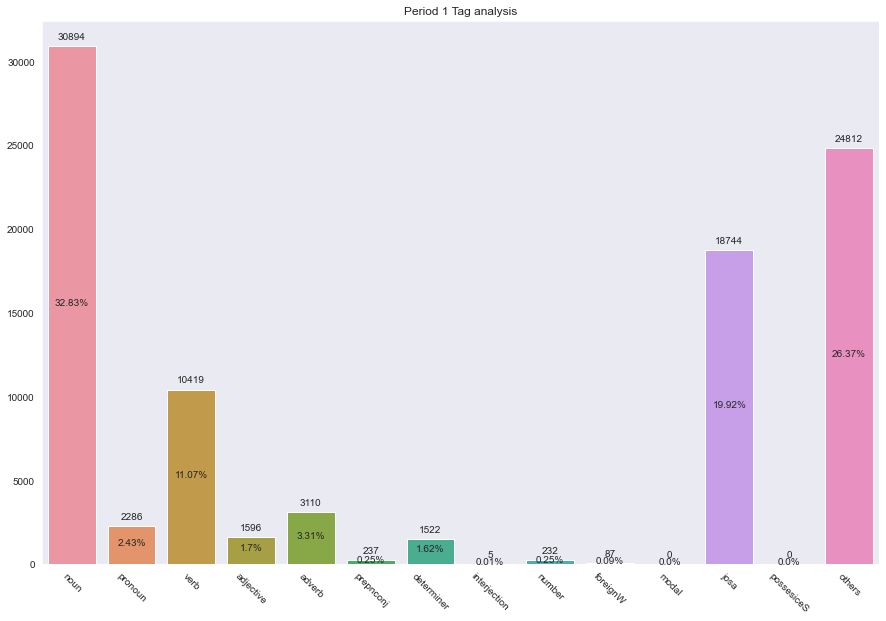

In [181]:
data, labels = DataNLabel(countDict_1)

plotBar(data, labels, "Period 1 Tag analysis")

#### Period 2

In [97]:
countDict_2, classDict_2 = calcTags(tagged_2, tagList)

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/38067 [00:00<?, ?it/s]

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


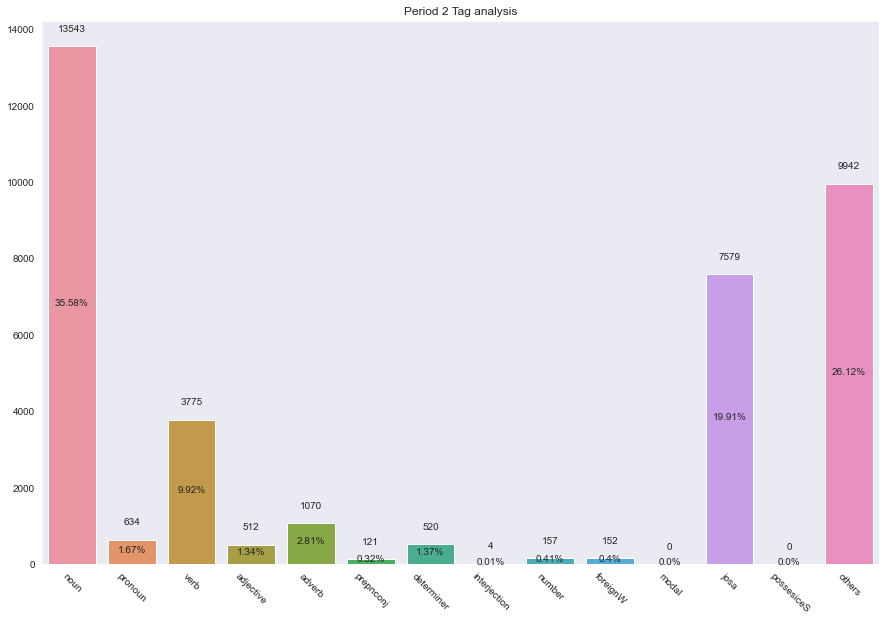

In [182]:
data, labels = DataNLabel(countDict_2)

plotBar(data, labels, "Period 2 Tag analysis")

#### Period 3

In [98]:
countDict_3, classDict_3 = calcTags(tagged_3, tagList)

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/58736 [00:00<?, ?it/s]

C:\Users\marti\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


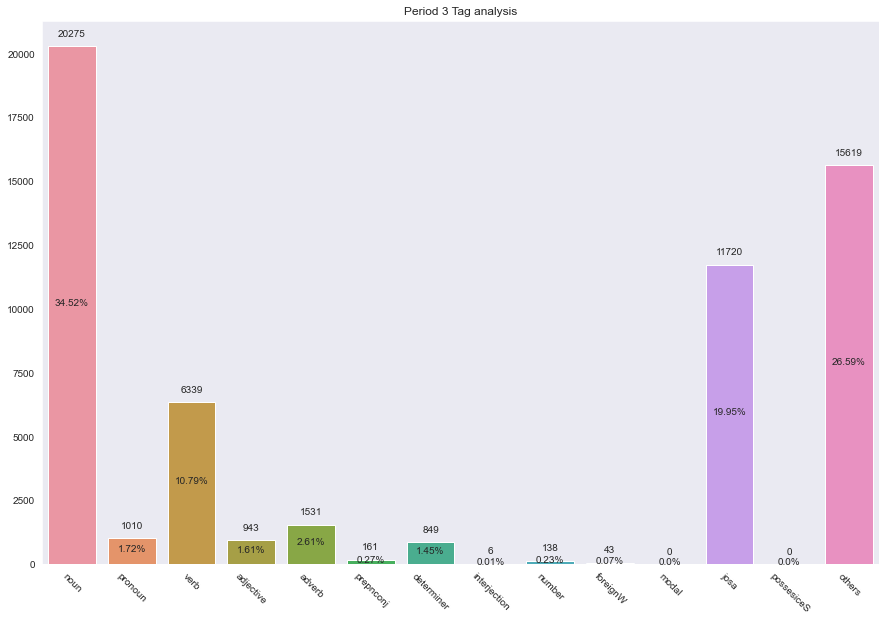

In [183]:
data, labels = DataNLabel(countDict_3)

plotBar(data, labels, "Period 3 Tag analysis")